In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configuration des visualisations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


In [3]:
# Chargement des datasets
general_data = pd.read_csv("general_data.csv")
manager_survey_data = pd.read_csv("manager_survey_data.csv")
employee_survey_data = pd.read_csv("employee_survey_data.csv")

# Affichage des premières lignes de chaque dataset
print("General Data:")
display(general_data.head())
print("Manager Survey Data:")
display(manager_survey_data.head())
print("Employee Survey Data:")
display(employee_survey_data.head())


General Data:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Manager Survey Data:


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Employee Survey Data:


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
# Vérification des valeurs manquantes
print("Valeurs manquantes dans General Data:")
print(general_data.isnull().sum())

print("\nValeurs manquantes dans Manager Survey Data:")
print(manager_survey_data.isnull().sum())

print("\nValeurs manquantes dans Employee Survey Data:")
print(employee_survey_data.isnull().sum())


Valeurs manquantes dans General Data:
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Valeurs manquantes dans Manager Survey Data:
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Valeurs manquantes dans Employee Survey Data:
EmployeeID                  0
EnvironmentSatisfaction 

In [7]:
# Imputation des valeurs numériques par la moyenne
imputer_num = SimpleImputer(strategy="mean")
numerical_cols = general_data.select_dtypes(include=['float64', 'int64']).columns
general_data[numerical_cols] = imputer_num.fit_transform(general_data[numerical_cols])

# Imputation des valeurs catégorielles par la valeur la plus fréquente
imputer_cat = SimpleImputer(strategy="most_frequent")
categorical_cols = general_data.select_dtypes(include=['object']).columns
general_data[categorical_cols] = imputer_cat.fit_transform(general_data[categorical_cols])

print("\nVérification après imputation:")
print(general_data.isnull().sum())



Vérification après imputation:
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [9]:
# Fusion des datasets sur EmployeeID
merged_data = general_data.merge(manager_survey_data, on="EmployeeID").merge(employee_survey_data, on="EmployeeID")
print("\nDimensions du dataset fusionné:", merged_data.shape)
display(merged_data.head())



Dimensions du dataset fusionné: (4410, 29)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51.0,No,Travel_Rarely,Sales,6.0,2.0,Life Sciences,1.0,1.0,Female,...,1.0,6.0,1.0,0.0,0.0,3,3,3.0,4.0,2.0
1,31.0,Yes,Travel_Frequently,Research & Development,10.0,1.0,Life Sciences,1.0,2.0,Female,...,6.0,3.0,5.0,1.0,4.0,2,4,3.0,2.0,4.0
2,32.0,No,Travel_Frequently,Research & Development,17.0,4.0,Other,1.0,3.0,Male,...,5.0,2.0,5.0,0.0,3.0,3,3,2.0,2.0,1.0
3,38.0,No,Non-Travel,Research & Development,2.0,5.0,Life Sciences,1.0,4.0,Male,...,13.0,5.0,8.0,7.0,5.0,2,3,4.0,4.0,3.0
4,32.0,No,Travel_Rarely,Research & Development,10.0,1.0,Medical,1.0,5.0,Male,...,9.0,2.0,6.0,0.0,4.0,3,3,4.0,1.0,3.0


In [11]:
# Statistiques descriptives
display(merged_data.describe())


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493497,3.659108,0.0,...,7.774275,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


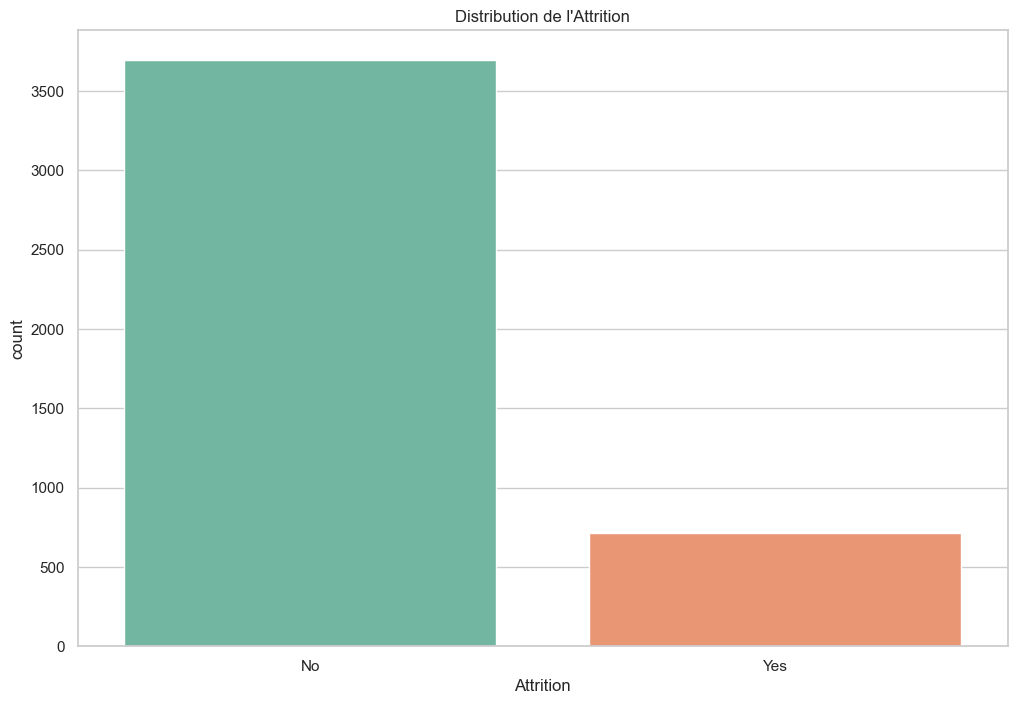

In [13]:
# Distribution de la variable cible (Attrition)
sns.countplot(data=merged_data, x="Attrition", palette="Set2")
plt.title("Distribution de l'Attrition")
plt.show()


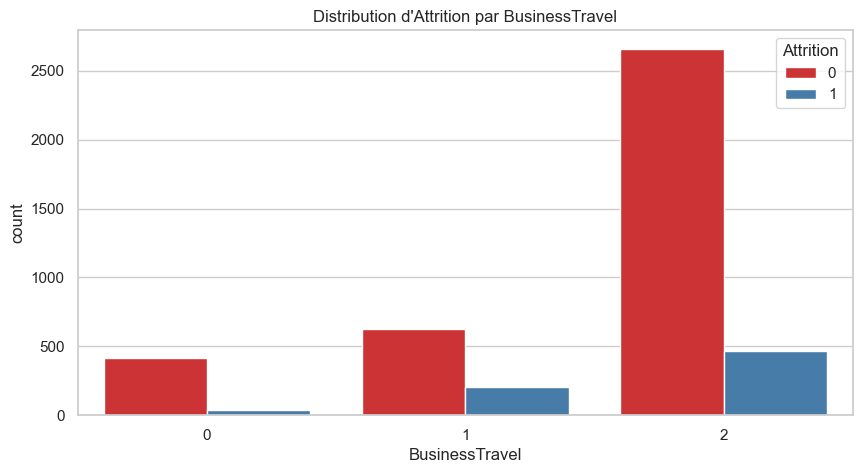

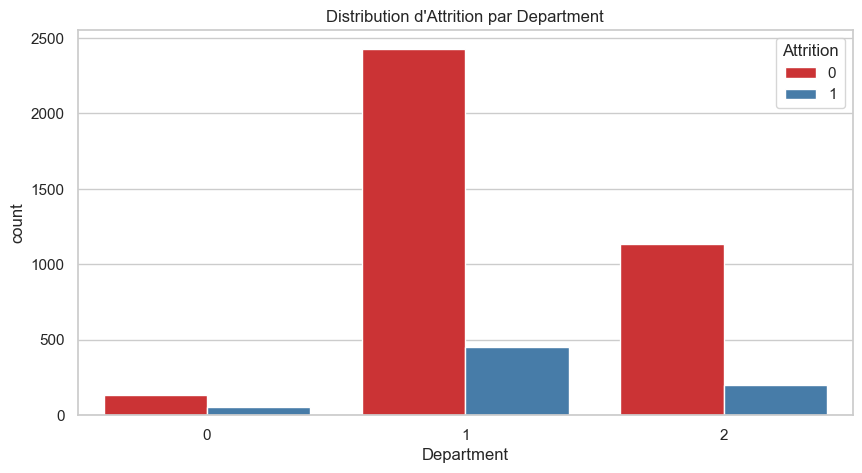

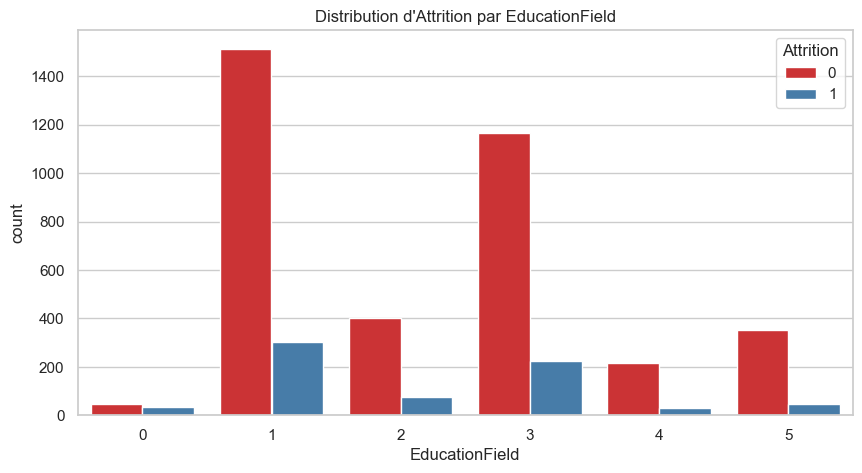

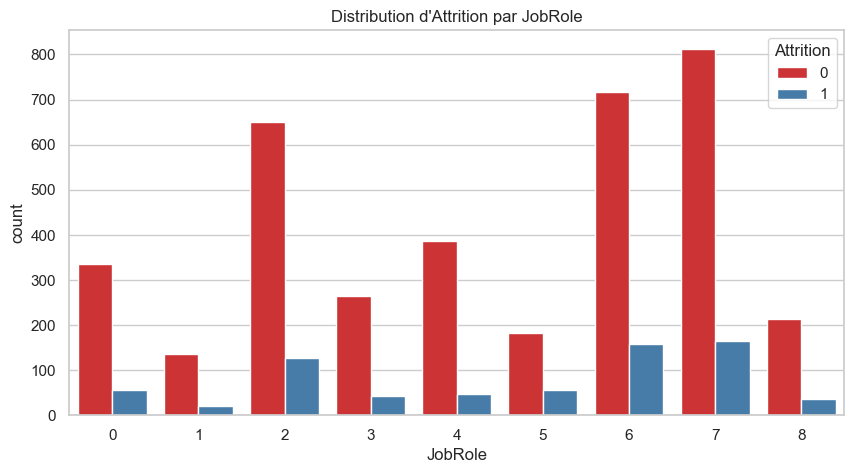

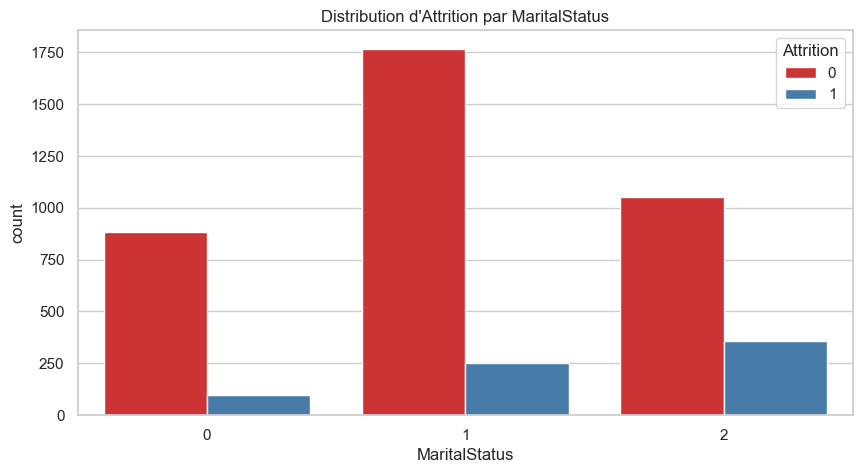

In [37]:
# Visualisation des variables catégorielles
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=merged_data, x=col, hue="Attrition", palette="Set1")
    plt.title(f"Distribution d'Attrition par {col}")
    plt.show()


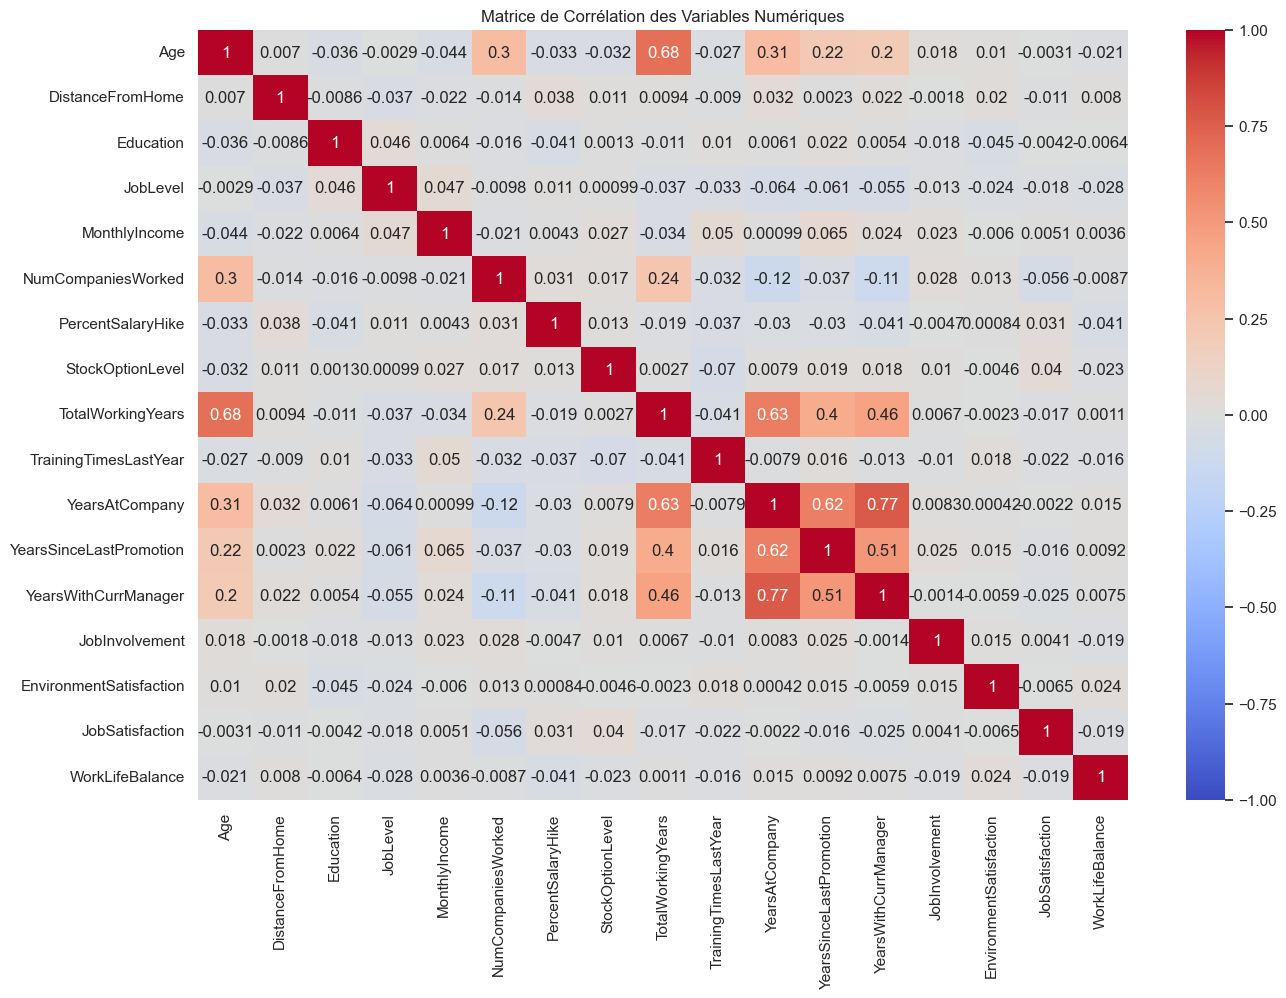

In [27]:
labelencoder = LabelEncoder()

# Sélection des colonnes non numériques
for col in merged_data.select_dtypes(include=['object']).columns:
    merged_data[col] = labelencoder.fit_transform(merged_data[col])

# Sélection des colonnes numériques après encodage
numeric_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Suppression des colonnes non pertinentes (constantes ou identifiants)
columns_to_drop = ['EmployeeCount', 'EmployeeID', 'StandardHours', 'Over18', 'PerformanceRating']
numeric_cols = numeric_cols.drop(columns_to_drop, errors='ignore')

# Calcul de la matrice de corrélation
corr = merged_data[numeric_cols].corr()

# Création de la heatmap avec toutes les corrélations
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()


In [29]:
# Encodage des variables catégorielles
labelencoder = LabelEncoder()
for col in categorical_cols:
    merged_data[col] = labelencoder.fit_transform(merged_data[col])

# Vérification
print("\nAperçu des données après encodage:")
display(merged_data.head())



Aperçu des données après encodage:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51.0,0,2,2,6.0,2.0,1,1.0,1.0,0,...,1.0,6.0,1.0,0.0,0.0,3,3,3.0,4.0,2.0
1,31.0,1,1,1,10.0,1.0,1,1.0,2.0,0,...,6.0,3.0,5.0,1.0,4.0,2,4,3.0,2.0,4.0
2,32.0,0,1,1,17.0,4.0,4,1.0,3.0,1,...,5.0,2.0,5.0,0.0,3.0,3,3,2.0,2.0,1.0
3,38.0,0,0,1,2.0,5.0,1,1.0,4.0,1,...,13.0,5.0,8.0,7.0,5.0,2,3,4.0,4.0,3.0
4,32.0,0,2,1,10.0,1.0,3,1.0,5.0,1,...,9.0,2.0,6.0,0.0,4.0,3,3,4.0,1.0,3.0


In [31]:
# Standardisation des variables numériques
scaler = StandardScaler()
scaled_cols = numerical_cols.drop(["EmployeeID"])  # Exclure l'ID
merged_data[scaled_cols] = scaler.fit_transform(merged_data[scaled_cols])

print("\nAperçu des données après standardisation:")
display(merged_data[scaled_cols].head())



Aperçu des données après standardisation:


,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1.541369,-0.393938,-0.891688,0.0,-0.961486,1.405136,-0.679777,-1.150554,0.0,-0.932014,-1.322452,2.483396,-0.981014,-0.679146,-1.155935
1,-0.648668,0.099639,-1.868426,0.0,-0.961486,-0.491661,-1.080866,2.129306,0.0,0.241988,-0.679232,0.155707,-0.327893,-0.368715,-0.034520
2,-0.539166,0.963398,1.061787,0.0,1.749610,2.725053,-0.679777,-0.057267,0.0,2.589994,-0.807876,-0.620189,-0.327893,-0.679146,-0.314873
3,0.117845,-0.887515,2.038524,0.0,0.845911,0.386301,0.122400,-1.150554,0.0,2.589994,0.221276,1.707500,0.161947,1.493867,0.245834
4,-0.539166,0.099639,-1.868426,0.0,-0.961486,-0.884109,0.523489,-0.877232,0.0,1.415991,-0.293300,-0.620189,-0.164613,-0.679146,-0.034520
